## Monitoring ML


Según lo estudiado en nuestras sesiones previas, comprendemos que la generación de un modelo de Machine Learning (ML) implica una serie de tareas de desarrollo de software, en las cuales, numerosos problemas pueden surgir. A continuación, examinaremos algunos casos típicos.

* Problemas relacionados con la calidad de los datos (Data quality): Las tuberías de procesamiento de datos pueden fallar; el código encargado de su procesamiento puede contener errores; o el método de adquisición de las características puede no ser el más apropiado. Esto puede llevar a datos de calidad insatisfactoria y, en consecuencia, a predicciones poco fiables.

* Desplazamiento de datos (Data Drift): Cuando desplegamos un modelo en producción, interactúa con datos del mundo real (datos empresariales o población objetivo). Es frecuente toparnos con nuevas subpoblaciones o segmentos de datos que el modelo no había experimentado durante su etapa de entrenamiento. Por ejemplo, si surge un nuevo grupo de consumo dentro de nuestros clientes de una plataforma de comercio digital, el modelo podría tener dificultades para adaptarse a estos inusuales patrones de consumo, y como resultado, tendría problemas al realizar predicciones precisas.

* Desplazamiento del concepto (Concept Drift): Este ocurre cuando la conducta de los clientes evoluciona con el tiempo, de modo que los patrones que el modelo inicialmente aprendió durante su entrenamiento ya no son relevantes. Supongamos que trabajas en una plataforma de comercio digital; con el tiempo, a medida que las tendencias cambian y aparecen más vendedores y una mayor variedad de productos, las recomendaciones basadas en el modelo inicial pueden volverse obsoletas e inexactas.


Como ingenieros de MLOps (Machine Learning Operations), nuestro rol es gestionar estos problemas y garantizar el rendimiento óptimo del modelo de ML a lo largo de su ciclo de vida. En este módulo final, exploraremos distintas técnicas de monitoreo y mejora para eficientizar estas operaciones.



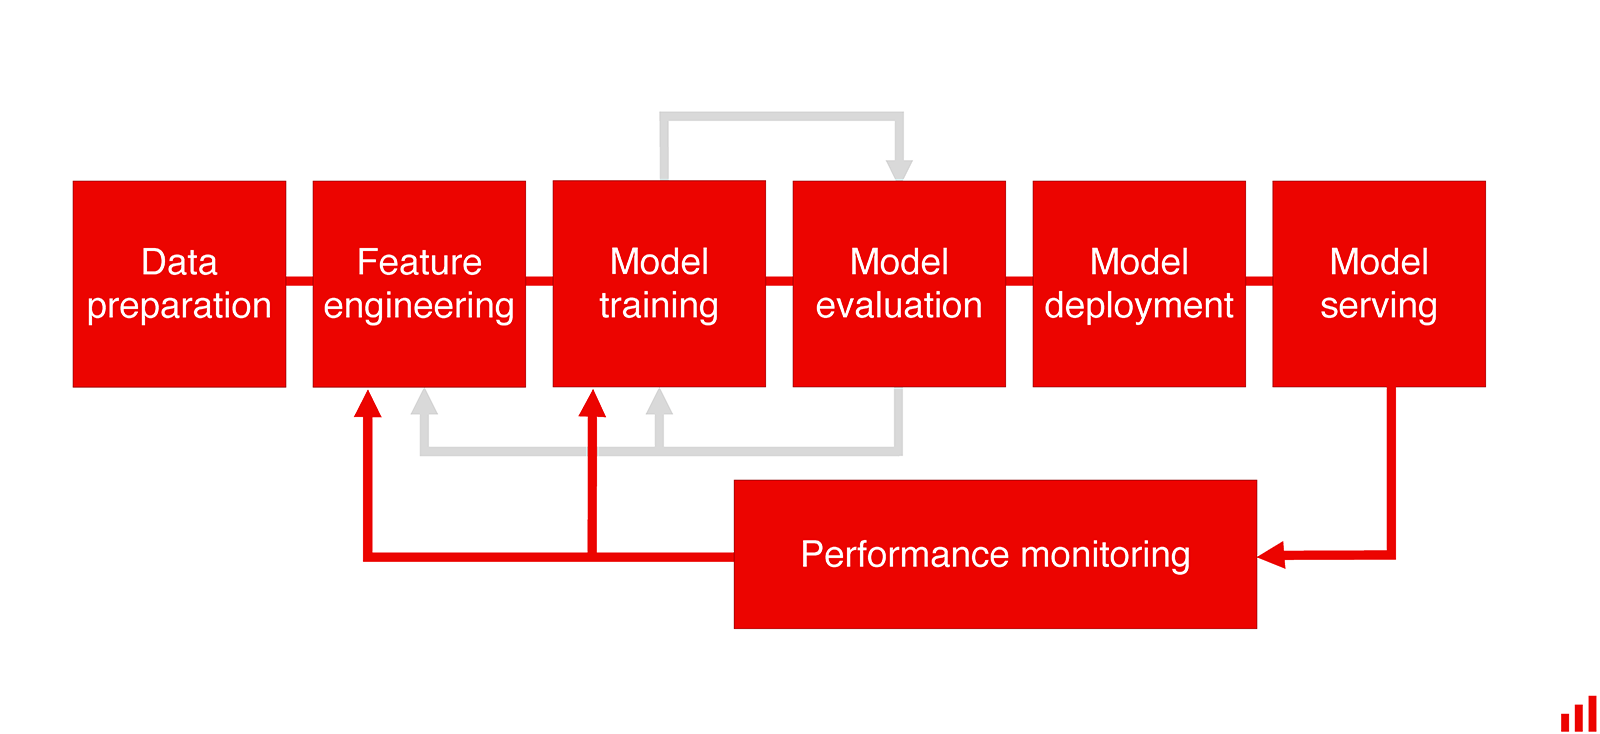


                                            Source: https://www.evidentlyai.com/blog/mlops-monitoring

La idea de implementar monitoring es responder a las siguientes preguntas:

* Cómo le va al modelo?

* Hay aumento extraño en las peticiones al modelo de un número extraño de usuarios provenientes de una región en particular?

* Debo volver a entrenar el modelo ya que tienden a degradarse con el tiempo? Ha habido caída en las medidas de desempeño? 

* Debo escalar el servicio? 

## ¿Cómo obtener métricas en Producción?



Recoger métricas de modelos ML en producción puede ser un desafío, especialmente porque es necesario tener en cuenta tanto la privacidad de los datos como la eficiencia del sistema. Afortunadamente, existen varias estrategias para hacer esto:

1. **Registro de Predicciones y Características:** Una opción es registrar las predicciones del modelo y las características de entrada correspondientes en una base de datos o sistema de registro. Esto permite calcular diversas métricas posteriormente. Sin embargo, hay que tener en cuenta la privacidad de los datos y también el rendimiento, ya que el registro intensivo puede sobrecargar los servidores de la base de datos.

2. **Retención de Predicciones y Resultados Reales:** Si puedes retener tanto las predicciones del modelo como los resultados reales, puedes calcular muchas métricas de precisión, como la precisión y el recall en clasificación, o error cuadrático medio en regresión. Necesitas tener una política clara de retención de datos para este enfoque.

3. **Generación de Etiquetas de Resultados Reales:** En algunos casos, las predicciones del modelo pueden influir en el resultado real, como en el caso de las recomendaciones de productos. Para estas situaciones, puede ser útil generar etiquetas de resultados reales que cuenten la historia completa. Por ejemplo, si el modelo recomienda un producto, y el usuario compra ese producto, la etiqueta de resultado real se anota como "compra después de la recomendación en lugar de una compra orgánica".

4. **Métricas Operacionales:** Además de las métricas de precisión, se deben monitorear otras métricas operativas, como la latencia del sistema, la tasa de fallas, el uso de la CPU y la memoria, etc. Estas métricas pueden recogerse automáticamente desde el sistema de servidores.

Estas estrategias pueden combinarse de varias maneras dependiendo de las necesidades y restricciones específicas de tus operaciones de ML. Recuerda que la clave es equilibrar las preocupaciones sobre la precisión del modelo, la privacidad de los datos y la eficiencia del sistema.

Por último, quiero que te quede bastante claro como puede variar el monitoring dependiendo del tipo de serving que hagamos, para nuestro proyecto de **tickets classification** lo hemos servido bajo modalidad de batch, pero recuerda que también se puede desplegar y disponibilizar bajo la modalidad de serving online. 


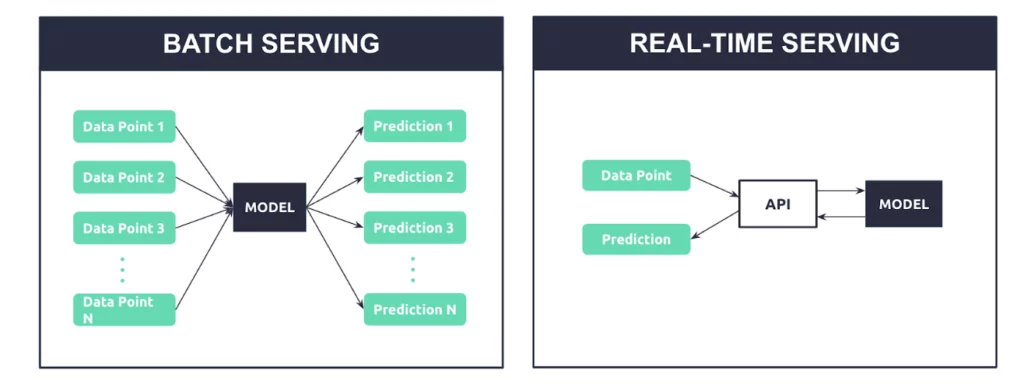

                                        Source: https://www.iguazio.com/glossary/model-serving-pipeline/
                                        

1. **Monitoreo durante el Serving por Batch:** Supón que tienes un modelo ML que procesa informes de ventas del día anterior cada mañana. Aquí, el monitoreo podría implicar registrar cuándo se inició y finalizó el proceso de lote, cuántos informes se procesaron y qué tan bien se ajustaron las predicciones del modelo a los datos reales una vez que se conocieron los verdaderos resultados de ventas. Dado que los procesos por batch a menudo implican la interacción con grandes cantidades de datos a la vez y no en tiempo real, la latencia (es decir, el tiempo que tarda en generar una predicción) no es una métrica tan relevante como lo sería para las inferencias en tiempo real (Serving Online). En su lugar, es posible que desees centrarse más en métricas relacionadas con la eficiencia en el manejo de grandes volúmenes de datos y la precisión de las predicciones.

2. **Monitoreo durante el Serving Online:** Por otro lado, tal vez tienes un modelo ML que recomienda productos a los clientes en tu sitio web de comercio electrónico en tiempo real. En este caso, deseas monitorear no sólo la precisión de las recomendaciones (por ejemplo, qué porcentaje de las veces los clientes hicieron clic o compraron el producto recomendado), sino también métricas como la latencia (cuánto tiempo tarda el modelo en generar una recomendación una vez que se ha recibido una solicitud),  y la disponibilidad del servicio (porcentaje de tiempo en el que el sistema de recomendación está funcionando correctamente). ¿Te imaginas un modelo que tarde en hacer inferencia y ya hayas perdido a un potencial cliente? *¡Fataaaal!*

Para mantener la eficiencia durante el serving online, puedes anotar o marcar las solicitudes y respuestas que pasan por tu sistema en tiempo real, usando identificadores únicos para poder enlazarlos más tarde y no tener que almacenar datos sensibles. Después, puedes utilizar análisis de registros o herramientas de monitoreo de rendimiento para examinar estos datos marcados y reunir indicadores sobre cómo se desempeña tu modelo ML en producción.

En resumen, el monitoreo durante el serving por batch a menudo se centra más en las métricas de precisión y eficiencia para manejar grandes volúmenes de datos, mientras que el monitoreo durante el serving online también debe considerar la velocidad de respuesta y la disponibilidad del servicio.


¡Espero que te haya quedado bastante claro, no olvides dejar tus preguntas y seguir aprendiendo de este maravilloso mundo del Mlops!